In [1]:
###   Importação de bibliotecas   ###

In [1]:

import supercon_dados as tsd
import supercon_funcoes_apoio_ML as tsf
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
### Divisão dos dados que serão usados em um processão de validação cruzada para obtenção de melhores parâmetros  ###

In [3]:
X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem)

In [4]:
###   Treinamento do modelo com os melhores hiperparâmetros   ###

In [5]:
treino=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
###   Treino com todos os parâmetros   ###

treino.fit(X_treino,Y_treino)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

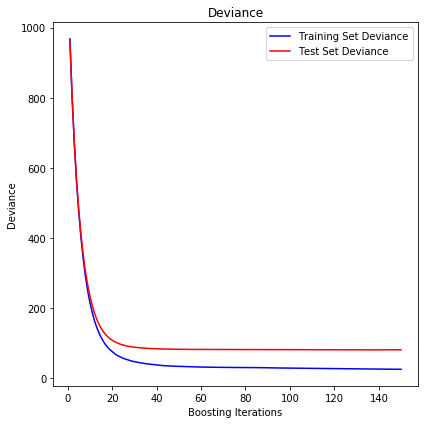

In [7]:
test_score = np.zeros((150,), dtype=np.float64)
for i, y_pred in enumerate(treino.staged_predict(X_teste)):
    test_score[i] = treino.loss_(Y_teste, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(150) + 1, treino.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(150) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [8]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino.predict(X_treino),Y_treino)))


 R^2: 
 0.978529264003916 
 RMSE : 
 5.0125391918021815


In [9]:
###   Imprime o resultado dos dados nunca treinados   ###

print('\n R^2: \n', treino.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino.predict(X_teste),Y_teste)))


 R^2: 
 0.9306406922946344 
 RMSE : 
 8.98631759960015


In [2]:
### Avaliando a média das medidas de desempenho com dados distribuídos de forma aleatória diferente ###

for c in [21,31,41,51,70]:
    
    ver_r2 = []
    ver_rmse = []
    
    
    X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem,random_state=c)
    
    treino=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
    
    treino.fit(X_treino,Y_treino)
    
    ver_r2.append(treino.score(X_teste,Y_teste))
    ver_rmse.append(np.sqrt(mean_squared_error(treino.predict(X_teste),Y_teste)))
    
    
ver_r2 = np.array(ver_r2)
ver_rmse = np.array(ver_rmse)

print(np.median(ver_r2),np.median(ver_rmse))

0.9291980499903002 9.14528848163869


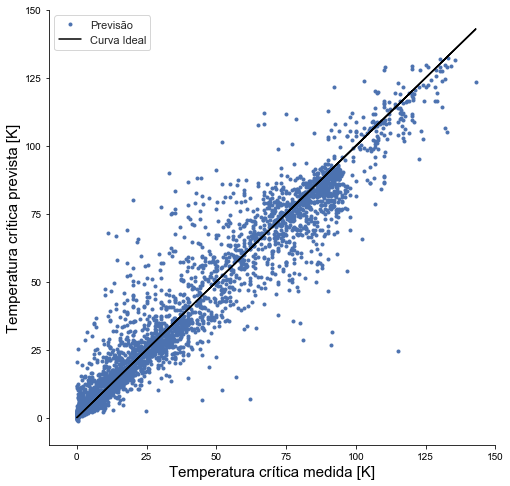

In [10]:
###   Gráfico que mostra sa previsões sobre o conjunto de teste   ###


print_x = Y_teste
print_y = treino.predict(X_teste)

fig, ax = plt.subplots(figsize=(8, 8))
# plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')
sns.set(style="ticks")
sns.despine()

plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, '-', label = 'Curva Ideal', color = 'black')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend('Previsão')
plt.legend()
plt.xticks(np.linspace(0, 150, 7, endpoint=True))
plt.yticks(np.linspace(0, 150, 7, endpoint=True))
plt.axis([-10,150,-10,150])

plt.savefig('gradiente_Tp_Tc.png', format='png')
plt.show()

In [12]:
###  Visualização de Erros   ###

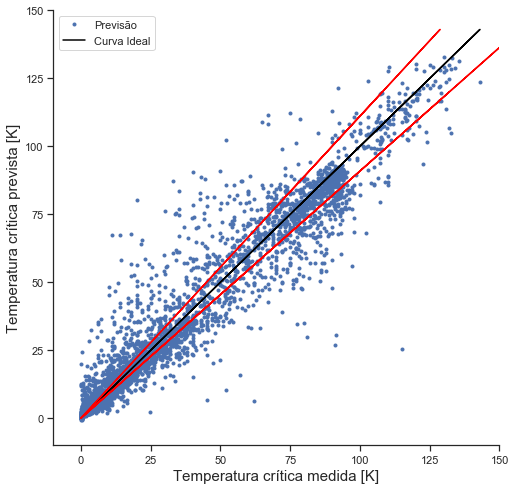

In [13]:
###   Gráfico que mostra sa previsões sobre o conjunto de teste   ###


print_x = Y_teste
print_y = treino.predict(X_teste)

fig, ax = plt.subplots(figsize=(8, 8))
# plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')
sns.set(style="ticks")
sns.despine()

plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, '-', label = 'Curva Ideal', color = 'black')
plt.plot(print_x*0.9,print_x, '-', color = 'red')
plt.plot(print_x*1.1,print_x, '-', color = 'red')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend('Previsão')
plt.legend()
plt.xticks(np.linspace(0, 150, 7, endpoint=True))
plt.yticks(np.linspace(0, 150, 7, endpoint=True))
plt.axis([-10,150,-10,150])

plt.show()

In [14]:
###   Análise por faixa de temperatura   ###

In [11]:
#Dados das previsões e do banco de dados NIMS

dados_agrupamento=pd.DataFrame({'Y_teste':Y_teste ,'Y_previsto':treino.predict(X_teste)})

In [12]:
dados_agrupamento['Desvio'] = abs((dados_agrupamento['Y_previsto']-dados_agrupamento['Y_teste']))/dados_agrupamento['Y_teste']

In [13]:
# condições para avaliar as faixas de temperatura

def agrupar(x):
    
    lista = np.linspace(0, 150,16)
    
    for i in range(len(lista)):
        
        if x['Y_teste']<lista[i+1] and x['Y_teste']>=lista[i]:
            
            return i 
        
dados_agrupamento['grupo'] = dados_agrupamento.apply(agrupar, axis=1)

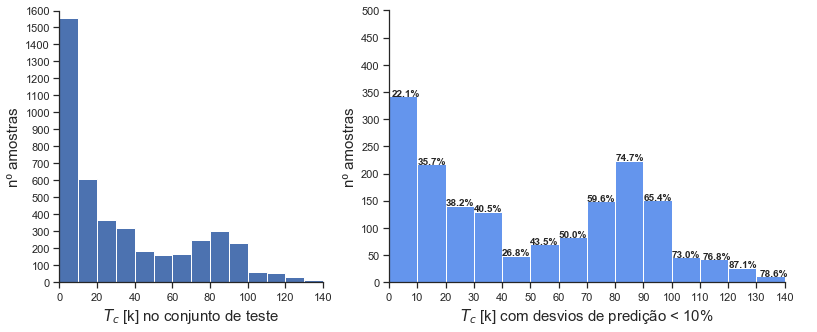

In [20]:
f, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 6]},figsize=(13, 5) )

sns.set(style="ticks")
sns.despine()

y = []

for c in range(max(dados_agrupamento['grupo'])+1):
    
    y.append(len(dados_agrupamento.loc[dados_agrupamento['grupo']==c]))

ax[0].bar(np.linspace(0, 140,15,endpoint=True)+5,np.array(y),width=10)


y2 = []

for c in range(max(dados_agrupamento['grupo'])+1):


    y2.append(len(dados_agrupamento.loc[(dados_agrupamento['grupo']==c)&(dados_agrupamento['Desvio']<=0.1)]))
    
ax[1].bar(np.linspace(0, 140,15,endpoint=True)+5,np.array(y2),color='cornflowerblue',width=10)   



for c in range(max(dados_agrupamento['grupo'])+1):
    
    if c==0 or c==11 or c==13 or c==14:
        
        a = len(dados_agrupamento.loc[(dados_agrupamento['grupo']==c)&(dados_agrupamento['Desvio']<=0.1)])
        b = len(dados_agrupamento.loc[(dados_agrupamento['grupo']==c)])
        p = round((a/b)*100, 1)

        cx = c*10

        ax[1].annotate(str(p)+'%', xy = (cx+1,a),fontsize = 10,fontweight='bold')
    
    else:
        
        a = len(dados_agrupamento.loc[(dados_agrupamento['grupo']==c)&(dados_agrupamento['Desvio']<=0.1)])
        b = len(dados_agrupamento.loc[(dados_agrupamento['grupo']==c)])
        p = round((a/b)*100, 1)

        cx = c*10

        ax[1].annotate(str(p)+'%', xy = (cx,a),fontsize = 10,fontweight='bold')


ax[0].set_ylabel('nº amostras',fontsize = 15)
ax[0].set_xlabel('$T_c$ [k] no conjunto de teste',fontsize = 15)
ax[1].set_ylabel('nº amostras',fontsize = 15)
ax[1].set_xlabel('$T_c$ [k] com desvios de predição < 10%',fontsize = 15)

ax[0].axis([0,140,0,1600])
ax[1].axis([0,140,0,500])

ax[0].set_yticks(np.linspace(0, 1600, 17, endpoint=True))
ax[0].set_xticks(np.linspace(0, 140, 8, endpoint=True))

ax[1].set_yticks(np.linspace(0, 500, 11, endpoint=True))
ax[1].set_xticks(np.linspace(0, 140, 15, endpoint=True))

plt.savefig('gradiente_erros.png', format='png')

In [15]:
###   Avaliando as principais características do modelo   ###

In [16]:
#Conjunto de dados usados para avaliar os melhores parâmetros

importancia = pd.DataFrame(np.transpose(treino.feature_importances_),index=X_treino.columns)
importancia_ordenada=importancia.sort_values(ascending=False,by=[0])
importancia_ordenada_top_15=np.transpose(importancia_ordenada.iloc[0:15,:])
importancia_ordenada_top_5=np.transpose(importancia_ordenada.iloc[0:5,:])

In [17]:
importancia_ordenada.index.values[0:2]

array(['range_ThermalConductivity', 'wtd_gmean_ThermalConductivity'],
      dtype=object)

In [18]:
r_quadrado = []
erro_rmse = []

treino_n_parametros=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

for n_parametros in range(len(X_treino.columns)+1):
    
    treino_n_parametros.fit(X_treino.loc[:,importancia_ordenada.index.values[0:(n_parametros+1)]],Y_treino)
    
    r_quadrado.append(treino_n_parametros.score(X_teste.loc[:,importancia_ordenada.index.values[0:(n_parametros+1)]],Y_teste))
    erro_rmse.append(np.sqrt(mean_squared_error(treino_n_parametros.predict(X_teste.loc[:,importancia_ordenada.index.values[0:(n_parametros+1)]]),Y_teste)))

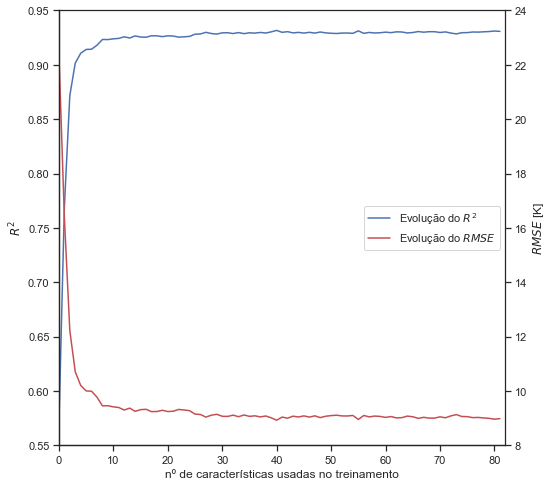

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.set(style="ticks")
sns.despine()

lns1 = ax.plot(r_quadrado, '-',color='b', label = 'Evolução do $R^2$')
ax.set_ylabel('$R^2$') 
ax.set_xlabel('nº de características usadas no treinamento')
# lns3 = ax.plot([81,81],[0,1], color = 'gray', label = 'nº parâmetros = 81')


ax2 = ax.twinx()
ax2.set_ylabel('$RMSE$ [K]') 
lns2 = ax2.plot(erro_rmse, '-', label = 'Evolução do $RMSE$',color='r')

ax.set_ylim(0.55, 0.95)
ax.set_xlim(0,82)
ax2.set_ylim(8,24)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5)

plt.savefig('gradiente_ganho.png', format='png')

In [29]:
###   As 15 características mais importantes do modelo   ###

([<matplotlib.axis.XTick at 0x1d9dbf34648>,
 <a list of 6 Text xticklabel objects>)

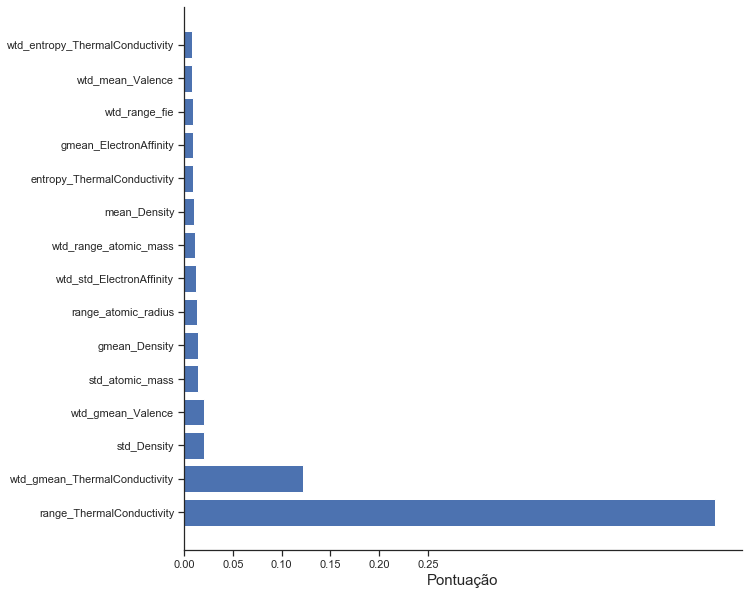

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.despine()
plt.barh(importancia_ordenada_top_15.columns, importancia_ordenada_top_15.values[0],color="b")
plt.xlabel('Pontuação',fontsize = 15)
plt.xticks(np.linspace(0, 0.25, 6, endpoint=True))

In [31]:
X_treino_importancia = X_treino.loc[:,importancia_ordenada_top_15.columns]
X_teste_importancia = X_teste.loc[:,importancia_ordenada_top_15.columns]

In [32]:
treino_importancia=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
treino_importancia.fit(X_treino_importancia,Y_treino)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia.score(X_treino_importancia,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia.predict(X_treino_importancia),Y_treino)))


 R^2: 
 0.9710725676894743 
 RMSE : 
 5.818208203673946


In [35]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia.score(X_teste_importancia,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia.predict(X_teste_importancia),Y_teste)))


 R^2: 
 0.9250706083607951 
 RMSE : 
 9.340185294634459


In [36]:
###   As 5 principais características do modelo   ###

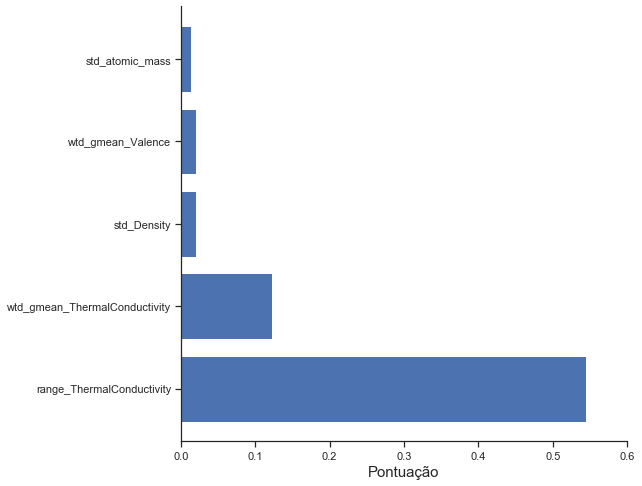

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.despine()
plt.barh(importancia_ordenada_top_5.columns, importancia_ordenada_top_5.values[0],color="b")
plt.xlabel('Pontuação',fontsize = 15)
plt.xticks(np.linspace(0, 0.6, 7, endpoint=True))
plt.savefig('gradiente_principais5.png', format='png')

In [38]:
X_treino_importancia_5 = X_treino.loc[:,importancia_ordenada_top_5.columns]
X_teste_importancia_5 = X_teste.loc[:,importancia_ordenada_top_5.columns]

In [39]:
treino_importancia_5=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
treino_importancia_5.fit(X_treino_importancia_5,Y_treino)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia_5.score(X_treino_importancia_5,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia_5.predict(X_treino_importancia_5),Y_treino)))


 R^2: 
 0.9585884268037345 
 RMSE : 
 6.961377416561102


In [42]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia_5.score(X_teste_importancia_5,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia_5.predict(X_teste_importancia_5),Y_teste)))


 R^2: 
 0.9106562024774696 
 RMSE : 
 10.19909396047416


In [43]:
### Testes com supercondutores do DEMAR EEL USP ###

In [44]:
# 9.5 K no Ti2GeC
# 4.1 K no HfV2Ga4
# 4.0 K no NiTe2
# 3.1 K no Ti2InC
# 7.8 K no Nb2SnC
# 8.7 K no Zr0.96V0.04B2
# 15.3 K no Nb5Ge3
# 7 K no Zr5Pt3C0.3

# 20 K no Ba0.84K0.16Fe2As2
  

In [45]:
# 9.5 K no Ti2GeC

treino.predict(tsd.analisar('Ti2GeC'))

Material:  Ti2Ge1C1


array([13.20158909])

In [46]:
# 4.1 K no HfV2Ga4

treino.predict(tsd.analisar('HfV2Ga4'))

Material:  Hf1V2Ga4


array([6.63456743])

In [47]:
# 4.0 K no NiTe2

treino.predict(tsd.analisar('NiTe2'))

Material:  Ni1Te2


array([2.39473052])

In [48]:
# 3.1 K no Ti2InC

treino.predict(tsd.analisar('Ti2InC'))

Material:  Ti2In1C1


array([5.42899806])

In [49]:
# 7.8 K no Nb2SnC

treino.predict(tsd.analisar('Nb2SnC'))

Material:  Nb2Sn1C1


array([6.59608676])

In [50]:
# 8.7 K no Zr0.96V0.04B2

treino.predict(tsd.analisar('Zr0.96V0.04B2'))

Material:  Zr0.96V0.04B2


array([6.67806062])

In [51]:
# 15.3 K no Nb5Ge3

treino.predict(tsd.analisar('Nb5Ge3'))

Material:  Nb5Ge3


array([3.79938842])

In [52]:
# 7 K no Zr5Pt3C0.3

treino.predict(tsd.analisar('Zr5Pt3C0.3'))

Material:  Zr5Pt3C0.3


array([6.74753957])